In [8]:
# Imports
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector

In [9]:
# Create the Quantum Circuit
qc = QuantumCircuit(3)

TargetState = [0.5, 0, 0, -0.5, 0, -0.5, -0.5, 0]
InitialState = [1/np.sqrt(2), 0, 0, 0, 0, 0, 0, -1/np.sqrt(2)]

Equivalent State
Statevector([ 0.5+0.j,  0. +0.j,  0. +0.j, -0.5+0.j,  0. +0.j, -0.5+0.j,
             -0.5+0.j,  0. +0.j],
            dims=(2, 2, 2))


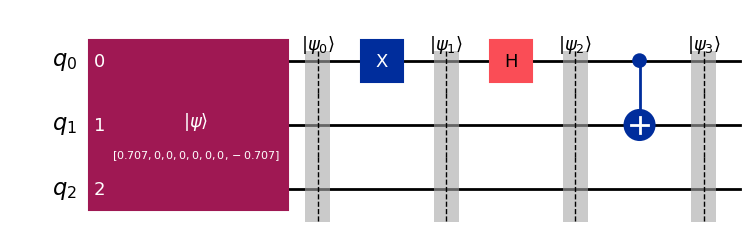

In [10]:
# Build a Example Gate
qc.initialize(InitialState)

qc.barrier(label=r'$|\psi_{0}\rangle$')

qc.x(0)

qc.barrier(label=r'$|\psi_{1}\rangle$')

qc.h(0)

qc.barrier(label=r'$|\psi_{2}\rangle$')

qc.cx(0, 1)

qc.barrier(label=r'$|\psi_{3}\rangle$')

state = Statevector.from_instruction(qc)

if (state.equiv(TargetState)):
    print("Equivalent State")

print(state)

qc.draw("mpl")

Equivalent State
Statevector([ 0.5+0.j,  0. +0.j,  0. +0.j, -0.5+0.j,  0. +0.j, -0.5+0.j,
             -0.5+0.j,  0. +0.j],
            dims=(2, 2, 2))


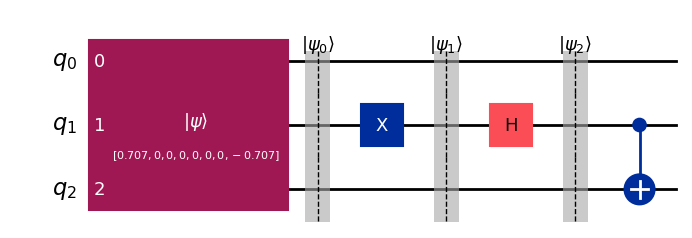

In [11]:
# Build a Example Gate
qc.clear()

qc.initialize(InitialState)

qc.barrier(label=r'$|\psi_{0}\rangle$')

qc.x(1)

qc.barrier(label=r'$|\psi_{1}\rangle$')

qc.h(1)

qc.barrier(label=r'$|\psi_{2}\rangle$')

qc.cx(1, 2)

state = Statevector.from_instruction(qc)

if (state.equiv(TargetState)):
    print("Equivalent State")

print(state)

qc.draw("mpl")

# 3 Quantum Parallelism (b)

In [12]:
# Imports
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector

In [13]:
# Defining the Function
def CreateModulo2Circuit(nQubits) -> QuantumCircuit:
    """Created a Circuit to compute  f(x) = x mod 2 for a N-Qubit System"""
    qc = QuantumCircuit(nQubits)
    qc.cx(0, nQubits - 1)    
    return qc

In [14]:
# Generating the circuits
for i in range(2, 10, 2):
    n = i
    my_circuit = CreateModulo2Circuit(n)
    print(f"Circuit for {n} qubits generated.")
    print(my_circuit.draw())

Circuit for 2 qubits generated.
          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘
Circuit for 4 qubits generated.
          
q_0: ──■──
       │  
q_1: ──┼──
       │  
q_2: ──┼──
     ┌─┴─┐
q_3: ┤ X ├
     └───┘
Circuit for 6 qubits generated.
          
q_0: ──■──
       │  
q_1: ──┼──
       │  
q_2: ──┼──
       │  
q_3: ──┼──
       │  
q_4: ──┼──
     ┌─┴─┐
q_5: ┤ X ├
     └───┘
Circuit for 8 qubits generated.
          
q_0: ──■──
       │  
q_1: ──┼──
       │  
q_2: ──┼──
       │  
q_3: ──┼──
       │  
q_4: ──┼──
       │  
q_5: ──┼──
       │  
q_6: ──┼──
     ┌─┴─┐
q_7: ┤ X ├
     └───┘


In [15]:

States = [[False, False, False],
          [False, False, True],
          [False, True, False],
          [False, True, True],
          [True, False, False],
          [True, False, True],
          [True, True, False],
          [True, True, True]]


def EvaluateState(state: list[bool]):
    a, b, c = state
    
    bit0 = (b and (not a)) ^ (b and (not c))
    bit1 = b and ( (not a) ^ c)
    bit2 = a ^ c
    
    bit0 = 1 if bit0 else 0
    bit1 = 1 if bit1 else 0
    bit2 = 1 if bit2 else 0
    
    return [bit0, bit1, bit2]
    

for state in States:
    print(EvaluateState(state))




[0, 0, 0]
[0, 0, 1]
[0, 1, 0]
[1, 0, 1]
[0, 0, 1]
[0, 0, 0]
[1, 0, 1]
[0, 1, 0]


# Question 4 Deutsch's Problem

In [16]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [17]:
def CreateDeutschJonesCircuit(n, case="balanced"):
    
    # Size of N + 1 Ancilla Qubit
    DJCircuit = QuantumCircuit(n+1, n)
    
    # Initialize an Ancilla Qubit with |1> state, and apply Hadamard to all other Qubits
    DJCircuit.x(n)
    for q in range(n+1):
        DJCircuit.h(q)
        
    DJCircuit.barrier()
    
    # Add an Oracle to the Circuit
    if case == "balanced":
        for q in range(n):
            DJCircuit.cx(q, n)
            
    elif case == "constant":
        if np.random.randint(2) == 1:
            DJCircuit.x(n)
            
    DJCircuit.barrier()
    
    
    # Apply the Hadamard to the Input register and measure it 
    for q in range(n):
        DJCircuit.h(q)
        
    for q in range(n):
        DJCircuit.measure(q, q)
        
    return DJCircuit    

In [18]:
# Using the Deutsch Jones
n=5
Case = "balanced"

circuit = CreateDeutschJonesCircuit(n, Case)
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts()

print(f"Results for {n}-qubit {Case} function:")
print(counts)

if '00000' in counts and counts['00000'] == 1024:
    print("Result: The function is CONSTANT.")
else:
    print("Result: The function is BALANCED.")
    
    
n=5
Case = "constant"

circuit = CreateDeutschJonesCircuit(n, Case)
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts()

print(f"Results for {n}-qubit {Case} function:")
print(counts)

if '00000' in counts and counts['00000'] == 1024:
    print("Result: The function is CONSTANT.")
else:
    print("Result: The function is BALANCED.")

Results for 5-qubit balanced function:
{'11111': 1024}
Result: The function is BALANCED.
Results for 5-qubit constant function:
{'00000': 1024}
Result: The function is CONSTANT.
